# Explainer Notebook
This notebook was written by:
* Martin Petersson, s103619
* Christoffer Jensen, s103148

## Motivation
We have chosen to collect data from the Game of Thrones universe. The data was collected from various sites and API's, such as:
* *API's*:
    * https://api.got.show/api/
* *Sites*:
    * http://gameofthrones.wikia.com/wiki/
    * http://www.avclub.com/tv/game-of-thrones-newbies/ 
    * http://transcripts.foreverdreaming.org/viewtopic.php?t=7739
    * http://genius.com/albums/Game-of-thrones/Season-1-scripts
    * http://genius.com/albums/Game-of-thrones/Season-4-scripts
    * http://genius.com/albums/Game-of-thrones/Season-5-scripts
    * http://genius.com/albums/Game-of-thrones/Season-6-scripts

*Description of dataset: * 

> We have collected all the characters from Game of Thrones. For each character we have also collected their wikia page and which house they belong to (for community detection)
Some of this data was accesible through the API at https://api.got.show/api/, but most wasn't why we had to parse the web pages of the pages found at http://gameofthrones.wikia.com/wiki/.

> This resulted in a Python dictionary containing 1062 characters from the Game of Thrones universe. Each entry in the dictionary contains two elements.
>
    1) The name of the house that the character is affiliated with. 
    2) A set of links from the character's wikia page.
> Furthermore, we have retrieved and created another dictionary containing information on the different houses in GoT.
An entry simply has the name of the house as key and a list of the members of the house as value.

> AV Club has reviews of almost every episode through the shows runtime. They are missing the first four episodes of the first season. These were not taken elsewhere due to the potential difference in the writing style from another site. These were used for making a sentiment analysis over all of the episodes in the show. 

> Genius had all the scripts for season 1, 4, 5, and 6, but were missing episodes in both season 2 and 3. These were retrieved from Transcripts.com. Though, it wasn't possible to scrape the content of the site via code, so each transcript had to be extracted manually and inserted into a textfile.

*We have chosen this particular dataset because:*

> One of the ideas with this project was to do text analysis on the show itself, and one of the best ways of doing this is using a transcript as they will tell what happens in each episode. Concerning reviews, we tried to find a site that had reviews for all of the episodes and AV Club was the only one we could find. We initially wanted to use Rotten Tomatoes, as they have a large collection of critic blurbs and binary rating for each episode and they had an API for such purposes, but when we begun the project we discovered that getting access to the API was not possible despite sending requests for an API key. 

> Furthermore, the show contains an enormous amount of characters, where most of them have an affiliation to one of the houses. We wanted to examines whether these communities are actually well-defined or whether there exists others that we do not know about. We also want to examine the network of characters to find the most important characters in the show in terms of different measures.

*Our goal for the end user's experience was to:*

> We wanted to do a sentiment analysis to get a grasp of the progress of the show. Game of Thrones is known for shocking and brutal content, so we wanted to see if this would be something we could show.

### Data cleaning and preprocessing

> When we retrieve the wikia page of each character, we use the BeautifulSoup library to get the HTML page. Since we only need a fraction of the page, everything else is filtered out. The remaining part of the page is also cleaned, as we are only interested in the internal links on the page, and the house information (*if it's present for the given character*).

> The data retreived from AV Club and Genius was done using BeautifulSoup, an API to scrape information from web sites. This was done as the sites themselves did not have a web API to retreive the data with. BeautifulSoup made it fairly easy to get the necessary text by looking for a unique class pertaining to the body of the site. The text from AV Club went through a cleaning process because the text came with a trivia section. 

> The text was cleaned from stop words and punctuation. For the word cloud, each episode in a season was collapsed into one text string. Afterwards, the text was sent through a TF-IDF process and used to generate the word cloud.

### Stats
> * The dataset contains 1062 characters and 11 houses, where 190 characters has connection to a house.
* There are 20697 internal links in total. The character with most links has 139 links.
* There are 56 reviews with an average character length of 9669 characters or about 1671 words.
* There are 60 transcripts with an average character length of 30205 or about 5311 words.

## Tools, theory and analysis
We have used a number of tools to analyse the data we have retrieved, such as:
> * *Centrality measures (Degree, betweenness and eigenvector)*

Centrality is used to discover the most important nodes in a network based on different properties of the graph. We have used these measures to discover which of the characters have highest importance in the GoT univserse, and whether there is a difference depending on the used measure. 
* *Degree centrality* ranks a node high if it has high degree, which indicates that there are many paths in the network through this particular node. It will be a different measure depending on whether you look at in-degree or out-degree or total degree. We have used total degree in this case, since we are interested in characters that are both highly referenced but only have reference to many others.
* *Betweenness centrality* ranks a node based on the number of shortest paths that includes the particular node. This tells something about how the node ties the network together, since it might be more sparse if it wasn't for this node (or more dense if you are looking at a node with low betweenness centrality). 
* *Eigenvector centrality* is a measure that ranks a node higher if it is connected to a node with high eigenvector centrality. This means that nodes are "rewarded" for linking to significant nodes in the network.

> Degree distribution

This is a tool that can be used to discover whether the distribution of degrees in the network follows a certain type of distribution (Poissonian, Power-law, etc). As there are different properties defined for each type of distribution, it would be nice to see if our data fit any of the types or not.

> Communitiy detection and modularity

The Game of Thrones universe contains some predefined communities, as characters are grouped into houses depending on their familiy or inheritance. Using the network we have built, we will examine whether these predefined houses are good communities or not. Maybe there exist some other communities as well that we will discover. We will look into the modularity of the communities, to see whether they are actually good communities. Modularity describes whether a set of nodes form a "good" community. A good community is one where there are more links in the community than expected (by probability). On the other hand, a bad community is one where the conncetions between nodes is random. Modularity can also discover whether a given set of nodes form a community at all. 


To get started analysing the GoT universe, we built a network (directed graph) with a node for each character and a link from character1 to character2 if there is a link to character2 from character1's wikia page.


### Methods explained:
>  ==================================================================================================================

> $\texttt{getCharacters()}$  
Retrives a dictionary over the characters of GoT. The value of each character is a dictionary containing *id*, *page*, and *house* information. These values will be filled in later.

> $\texttt{getHouseForCharacters(characters)}$  
Retrieves the house information for each character, if this information can be extracted from the site. The *characters[character]['house']* value is then updated, if house information is found. 

> $\texttt{getHouses(minCount)}$  
Returns a dictionary, with house as key, and a dictionary containing a list of members in the house and the number of members, as value. For the houses in GoT with more than *minCount* members.

> $\texttt{getLinks(characters)}$  
Returns an updated version of the *characters* dictionary, where the page element of each character has been set. Here, the BeautifulSoup library is used to retrieve the relevant parts of the characters' web page. Furthermore, we do not save the entire web page, but only the internal links it contains.

> $\texttt{createGoTNetwork(characters)}$  
Returns a DiGraph with characters as nodes and an edge between two characters if there is a link from the page of the first character to the other. The method also returns another DiGraph, which is the largest weakly connected component (G_wcc).

>  ==================================================================================================================

In [18]:
import json, operator, community
from urllib2 import urlopen
from bs4 import BeautifulSoup
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import cPickle as pickle
%matplotlib inline

def loadFile(filename):
    characters = pickle.load(open(filename, "rb" ))
    return characters

def saveFile(filename, content):
    pickle.dump(content, open(filename, "wb" ))
    
def prettifyName(name):
    name = name.replace('_',' ') if '_' in name else name
    return name

# retrieve the characters from the GoT wikia page. Save them in a dictionary.
def getCharacters():
    response = urlopen('http://gameofthrones.wikia.com/api/v1/Articles/List?expand=1&category=Characters&limit=10000')
    html = response.read()
    j = json.loads(html)

    characters = dict()
    for i in j['items']:
        if i['type'] == 'article':
            if not i['title'].startswith("Sandbox/"):
                title = i['title'].replace(' ', '_')
                characters[title] = {'id': i['id'], 'page' : set(), 'house' : None}
    return characters

# retrieve the house information for the characters and update the dictionary with the new information.
def getHouseForCharacters(characters):
    base = 'https://api.got.show/api/characters/'
    response = urlopen(base)
    html = response.read()
    chars = json.loads(html)
    for c in chars:
        name = c['name'].replace(' ', '_')
        if name in characters:
            if 'house' in c:
                characters[name]['house'] = c['house']    
    return characters

# retrieve all houses in the GoT universe, with *minCount* members.
def getHouses(minCount=5):
    houses = dict()
    for k,v in characters.iteritems():
        h = v['house']
        if h != None:
            if h in houses:
                houses[h]['count'] += 1
                houses[h]['members'].append(k)
            else:
                houses[h] = dict()
                houses[h]['count'] = 1
                houses[h]['members'] = list()
                houses[h]['members'].append(k)
            
    houses = {k: v for k,v in houses.iteritems() if v['count'] > minCount}
    return houses

# retrieve all links from the web page of a character, and update the characters dictionary with the new information.
def getLinks(characters):
    baseUrl = 'http://gameofthrones.wikia.com/wiki/'
    for char,v in characters.iteritems():
        url = baseUrl + char
        response = urlopen(url)
        source = response.read()
        soup = BeautifulSoup(source)
        div = soup.find(id="mw-content-text")
        ps = div.findChildren('p')
        for p in ps:
            hr = p.findChildren('a')
            if p.parent.name != 'td':
                for h in hr:
                    if h.has_attr('href'):
                        if h['href'].startswith('/wiki'):
                            ele = h['href'].split('/')[-1:][0]
                            if '?' not in ele and 'Category' not in ele and 'Season' not in ele and not ele.startswith('File'):
                                v['page'].add(ele) 
    return characters

# Print information about the houses, in a table.
def housesInfoTable(houses):
    sorted_houses = sorted(houses.items(), key=operator.itemgetter(1), reverse=True)
    house_table = PrettyTable(['House', 'Number of characters'])
    for h in sorted_houses:
        house_table.add_row([h[0], h[1]['count']])
    return house_table

# create a directed graph over the characters and their links.
def createGoTNetwork(characters):
    G = nx.DiGraph()
    G.add_nodes_from(characters.keys())
    for k,v in characters.iteritems():
        for name in characters.keys():
            if name != k:
                if name in v['page']:
                    G.add_edge(k, name)
    G_wcc = max(nx.weakly_connected_component_subgraphs(G),key=len)
    return G, G_wcc

# Print the networks.
def printNetworks(G, G_wcc):
    plt.figure(1,figsize=(12,12))
    pos = nx.layout.fruchterman_reingold_layout(G)
    nx.draw(G, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.25', with_labels=False, width=.5, pos=pos)
    plt.title('Full GoT network')
    plt.show()
    print "Network size : #nodes: {0}, #edges {1}".format(len(G.nodes()), len(G.edges()))

    plt.figure(2,figsize=(12,12))
    pos = nx.layout.fruchterman_reingold_layout(G_wcc)
    nx.draw(G_wcc, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.25', with_labels=False, width=.5, pos=pos)
    plt.title('The largest component in the GoT network')
    plt.show()
    print "Network size : #nodes: {0}, #edges {1}".format(len(G_wcc.nodes()), len(G_wcc.edges()))

# Print statistics of the graph, (i.e. degree, betweenness centrality, eigenvector centrality)
def printGraphStats(G_wcc, top=10):
    sorted_G_out_deg = sorted(G_wcc.out_degree().items(), key=operator.itemgetter(1), reverse=True)
    sorted_G_in_deg = sorted(G_wcc.in_degree().items(), key=operator.itemgetter(1), reverse=True)
    sorted_G_degree = sorted(G_wcc.degree().items(), key=operator.itemgetter(1), reverse=True)
    deg_table = PrettyTable(['Character - In degree',' Character - Out degree', 'Character - Total degree'])
    
    for i in range(top):
        a = ["%s, %d" % (prettifyName(sorted_G_in_deg[i][0]), sorted_G_in_deg[i][1]),
            "%s, %d" % (prettifyName(sorted_G_out_deg[i][0]), sorted_G_out_deg[i][1]),
            "%s, %d" % (prettifyName(sorted_G_degree[i][0]), sorted_G_degree[i][1])]
        deg_table.add_row(a)
    
    G_bc = nx.betweenness_centrality(G_wcc)
    G_bc_sorted = [(k, G_bc[k]) for k in sorted(G_bc, key=G_bc.get, reverse=True)]

    bc_table = PrettyTable(['Character', 'Betweenness centrality'])
   
    for i in range(top):
        a = [prettifyName(G_bc_sorted[i][0]),
            "%.3f" % G_bc_sorted[i][1]]
        bc_table.add_row(a)

    ec_table = PrettyTable(['Character', 'Eigenvector centrality (In-degree)',' Character', 'Eigenvector centrality (Out-degree)'])
    G_ec_in = nx.eigenvector_centrality(G_wcc)
    G_ec_out = nx.eigenvector_centrality(G_wcc.reverse())
    G_ec_in_sorted = [(k, G_ec_in[k]) for k in sorted(G_ec_in, key=G_ec_in.get, reverse=True)]
    G_ec_out_sorted = [(k, G_ec_out[k]) for k in sorted(G_ec_out, key=G_ec_out.get, reverse=True)]    
    
    
    for i in range(top):
        a = [prettifyName(G_ec_in_sorted[i][0]), 
             "%.4f" % G_ec_in_sorted[i][1],
            prettifyName(G_ec_out_sorted[i][0]),
            "%.4f" % G_ec_out_sorted[i][1]
            ]
        ec_table.add_row(a)
    return deg_table, bc_table, ec_table

# Plot the degree distribution of the graph. Set loglog=True for the plot with logarithmic axes.
def degreeDistPlots(G, loglog=False):
    # Plot the distribution of in-degrees
    plt.figure(1, figsize=(12,6))
    h1, be1 = np.histogram(G.in_degree().values(), bins='sqrt')
    h2, be2 = np.histogram(G.out_degree().values(), bins='sqrt')
    if loglog:
        plt.loglog(be1[:-1],h1,'-o')
        plt.xlim([0, pow(10, 2.13)])
        plt.ylim([0, pow(10, 2)])
        plt.title("Distribution of in-degrees loglog scale")
        plt.show()
        
        plt.figure(figsize=(12,6))
        plt.loglog(be2[:-1],h2,'-o')        
        plt.xlim([0, pow(10, 1.76)])
        plt.ylim([0, pow(10, 2.4)])
        plt.title("Distribution of out-degrees loglog scale")
        plt.show()
    else:
        plt.plot(be1[:-1], h1, '-r', label='In-degree')
        plt.plot(be2[:-1], h2, '-b', label='Out-degree')
        plt.title("Distribution of in- and out-degrees")
        plt.xlabel("Degree (k)")
        plt.ylabel("Number of nodes with degree k")
        plt.legend()
        plt.show()
        
# Plot a scatter plot over the degrees.
def degreeScatterPlot(G):
    x = range(len(G.nodes()))
    plt.figure(figsize=(10, 5))
    plt.scatter(x, G.in_degree().values(), c='r')
    plt.scatter(x, G.out_degree().values(), c='w')
    plt.legend(["in degree", "out degree"], loc=2)
    plt.ylim([pow(10,-0.1), pow(10, 2.1)])
    plt.xlim([pow(10,-0.1), pow(10,3.1)])
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Node")
    plt.ylabel("Degree")
    plt.show()
    
# Calculate the modularity of the predefined houses (using equation 9.12)
def calculateHouseModularity(houses):
    n_c = len(houses)
    m1 = 0; L1 = 0; k1 = 0
    for house, v in houses.iteritems():
        v['L'] = int(); v['k'] = int(); v['M'] = float(0);
        for member in v['members']:
            v['k'] += G.degree(member)
            for m in G.edges(member):
                if (m[0] != member and m[0] in v['members']) or (m[1] != member and m[1] in v['members']):
                    v['L'] += 1
    L = sum([v['k'] for v in houses.values()])

    for k,v in houses.iteritems():
        l_c = float(v['L']); k_c = float(v['k'])
        v['M'] = (l_c / L) - (pow((k_c / (2 * L)), 2.0))
    return houses

# Print the modularity for each house, in a table.
def houseModularityTable(houses):
    mt = PrettyTable(['House', 'L_c', 'k_c', 'M_c'])
    for k, v in houses.iteritems():
        mt.add_row([k, v['L'], v['k'], "%.5f" % v['M']])
    return mt

# Retrieve the communities using the Louvain algorithm, and print the corresponding network.
def showCommunityGraph(H):
    plt.figure(figsize=(10,10))
    partition = community.best_partition(H)
    size = float(len(set(partition.values())))
    pos = nx.spring_layout(H)
    count = 0.
    for com in set(partition.values()) :
        count = count + 1.
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        nx.draw_networkx_nodes(H, pos, list_nodes, node_size = 20, node_color = str(count / size))
    nx.draw_networkx_edges(H, pos, alpha=0.5)
    plt.axis('off')
    plt.show()
    
# Calculate the confusion matrix, given a undirected version of the network. 
def calculateConfusionMatrix(H):
    partition = community.best_partition(H)
    houses = getHouses()
    modularity = community.modularity(partition, H)
    noCommunities = max(partition.values())
    D = np.zeros((len(houses), noCommunities))
    for i in range(len(houses)):
        for j in range(noCommunities):
            for v in partition:
                if partition[v] == j:
                    if v in houses.values()[i]['members']:
                        D[i,j] += 1
    return D, modularity, noCommunities

# Plot the distribution of the elements in the confusion matrix (diagonal and non-diagonal elements.)
def confusionMatrixDist(D):
    diag = [D[i,j] for i in range(D.shape[0]) for j in range(D.shape[1]) if i == j]
    nondiag = [D[i,j] for i in range(D.shape[0]) for j in range(D.shape[1])if i != j]
    a, b = np.histogram(diag)
    a1, b1 = np.histogram(nondiag)

    plt.figure(1)
    plt.plot(b[:-1], a)
    plt.yticks(range(int(max(a))+1))
    plt.title("Distribution of diagonal elements")
    plt.show()

    plt.figure(2)
    plt.plot(b1[:-1], a1)
    plt.title("Distribution of non-diagonal elements")
    plt.show()
    
# We load the data from a file
characters = loadFile("got/characters.p")
houses = getHouses()
# Instead of retrieving it all over again:
# characters = getCharacters()
# characters = getHouseForCharacters(characters)
# characters = getLinks(characters)
# saveFile('got/characters.p', characters)

*Predefined Communities in the Game of Thrones universe.*

In [21]:
print "The following communities are defined in GoT.\n"
print housesInfoTable(houses)

The following communities are defined in GoT.

+--------------------+----------------------+
|       House        | Number of characters |
+--------------------+----------------------+
|  House Targaryen   |          46          |
|   Night's Watch    |          30          |
|    House Stark     |          30          |
|   House Martell    |          18          |
|  House Lannister   |          16          |
|   House Greyjoy    |          14          |
|     House Frey     |          10          |
| Faith of the Seven |          7           |
|    House Arryn     |          7           |
|    House Tyrell    |          6           |
|    House Tully     |          6           |
+--------------------+----------------------+


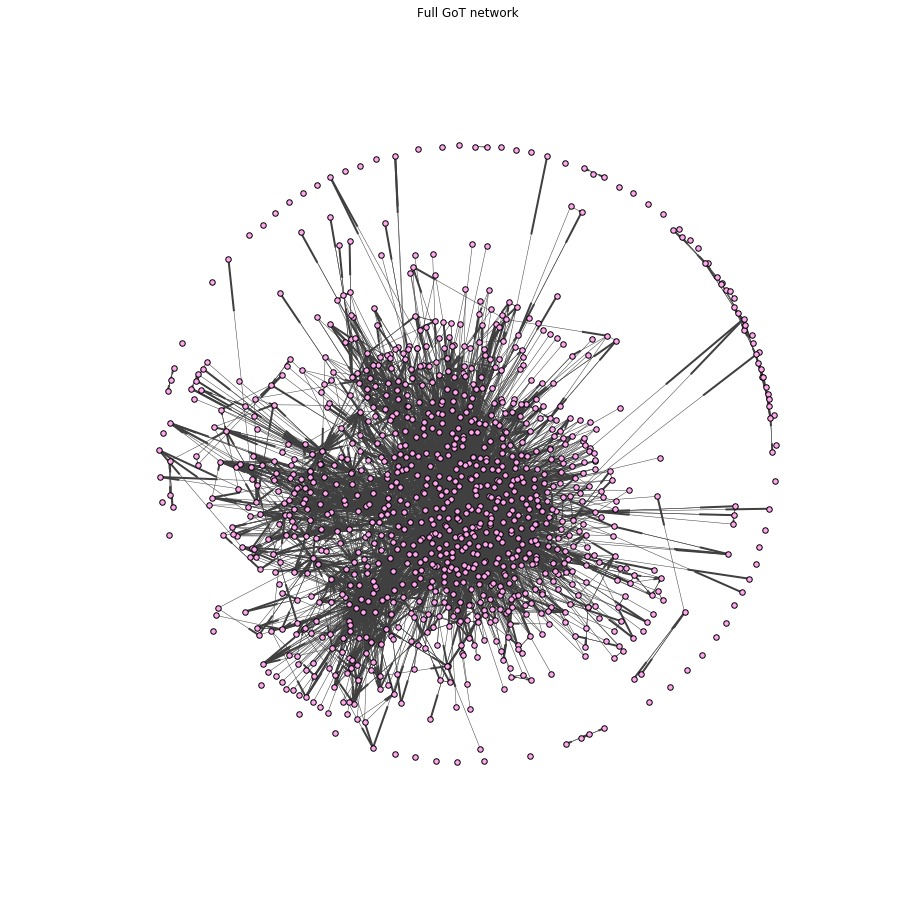

Network size : #nodes: 1062, #edges 7985


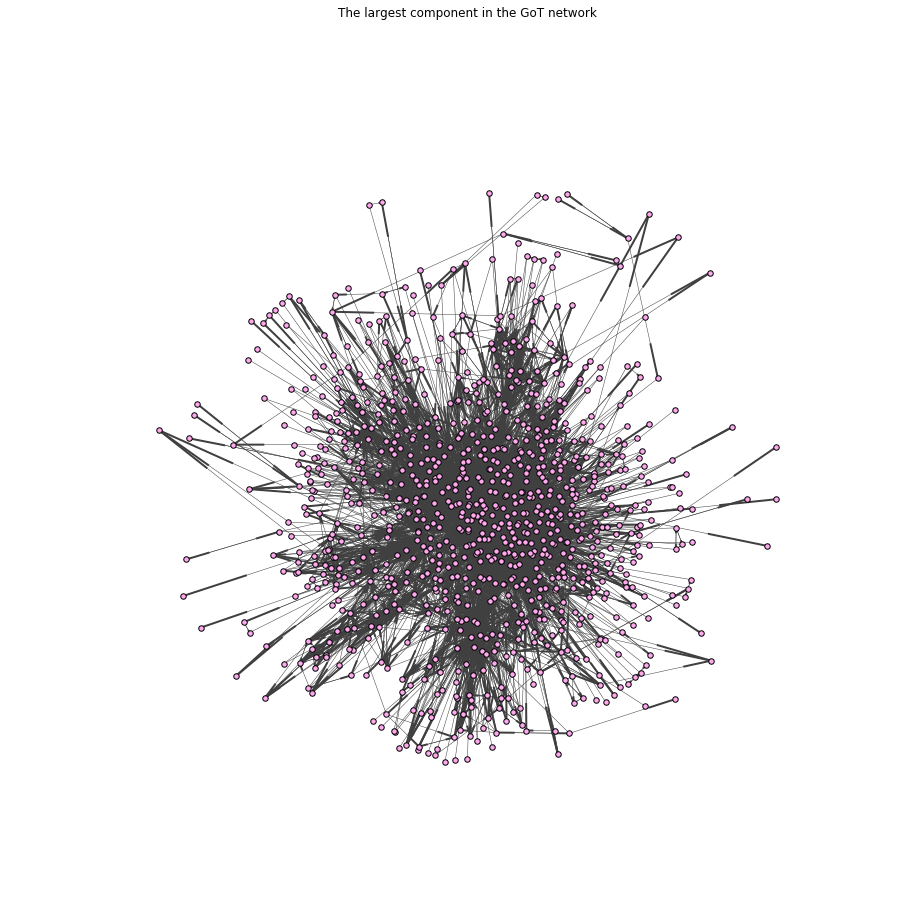

Network size : #nodes: 972, #edges 7907


In [12]:
G, G_wcc = createGoTNetwork(characters)
printNetworks(G, G_wcc)

### Network statistics
The tables below show the top 10 ranked characters in terms of the three different centrality measures (degree, betweenness, and eigenvector).

In [23]:
top = 10
deg_table, bc_table, ec_table = printGraphStats(G_wcc, top=top)
print "The top %d GoT characters in terms of in-degree, out-degree and total degree (in + out degree):" %top
print deg_table
print "\nThe top %d Game of Thrones characters in terms of betweenness centrality:" % top   
print bc_table
print "\nThe top %d Game of Thrones characters in terms of eigenvector centrality (In degree and out degree)" % top
print ec_table

The top 10 GoT characters in terms of in-degree, out-degree and total degree (in + out degree):
+-------------------------+-------------------------+--------------------------+
|  Character - In degree  |  Character - Out degree | Character - Total degree |
+-------------------------+-------------------------+--------------------------+
|  Tyrion Lannister, 187  |   Tyrion Lannister, 63  |  Tyrion Lannister, 250   |
|      Jon Snow, 170      |       Jon Snow, 57      |      Jon Snow, 227       |
| Daenerys Targaryen, 146 |     Eddard Stark, 56    |    Eddard Stark, 195     |
|     Robb Stark, 146     |        Varys, 54        | Daenerys Targaryen, 192  |
|    Eddard Stark, 139    |    Catelyn Stark, 53    |   Jaime Lannister, 183   |
|   Jaime Lannister, 138  |    Petyr Baelish, 50    |     Robb Stark, 180      |
|     Sansa Stark, 128    |    Theon Greyjoy, 50    |     Sansa Stark, 174     |
|  Stannis Baratheon, 125 |   Cersei Lannister, 48  |  Cersei Lannister, 166   |
|  Joffrey Ba

> The characters with the highest *betweenness centrality* are most likely the most famous. These have high betweenness centrality as they are referenced most times and thus they might act as a link between different parts of the GoT universe.


> *Eigenvector centrality* ranks a node higher if it is connected to a high-degree node than to a low-degree node.
This means that nodes with high-degree eighbors will get a higher eigenvector centrality than degree centrality, as degree centrality only takes that number of direct neighbors into account.

> There is a correlation between the pages with high *betweenness centrality* and high *eigenvector centrality* (for in degree) as these seem to be quite similar. It makes sense that the correlation is towards in degree and not out degree, since it is more likely that a bunch of characters refer to the same character and not the other way around.

Since the centrality measures did not reveal anything surprising, what about the assortativity?

In [10]:
H = G_wcc.to_undirected()
print "The degree assortativity coefficient of the undirected GoT network is %.2f" % nx.degree_assortativity_coefficient(H)

The degree assortativity coefficient of the undirected GoT network is -0.14


> Since the assortativity value of the undirected version of the GoT network is negative, it means that high-degree characters do not tend to link to other high-degree characters. The same is true for low-degree characters. Instead there might be a bunch of low-degree characters that links to all the high-degree characters, i.e. the tendency is that a low-degree characters is more likely to link to a high-degree character.

Let us take a look at the degree distribution below.

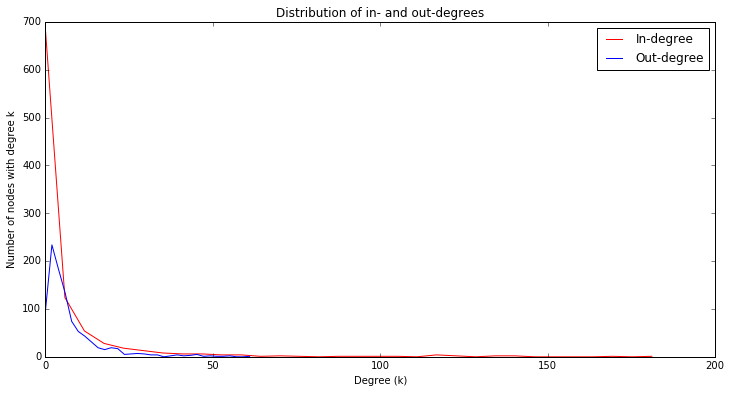

In [11]:
degreeDistPlots(G_wcc)

>The most common degree seems to be in the range from 0-5, for both in- and out-degree.

To discover whether the distribution can be described as a well-known type (i.e. Poissonian), we'll consider the distribution in a loglog plot:

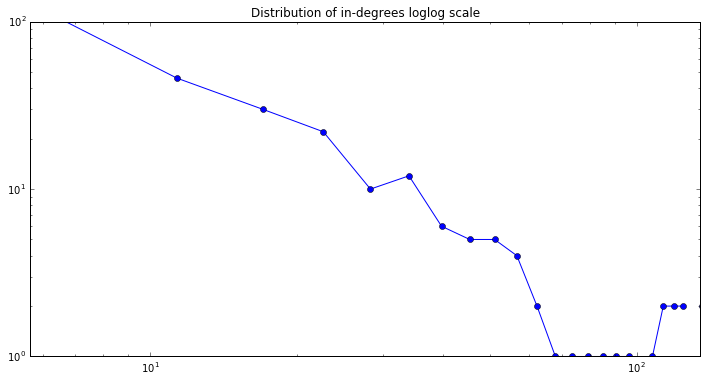

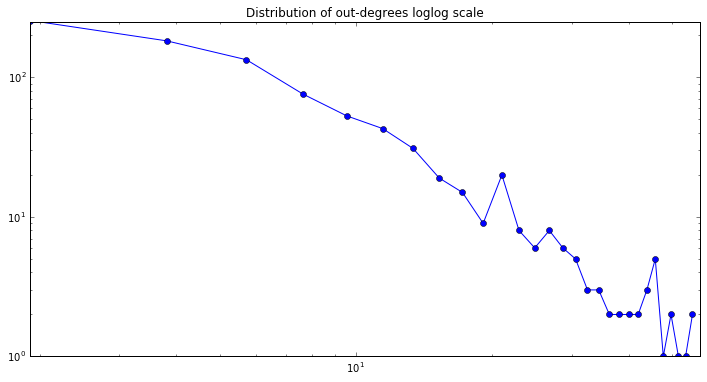

In [12]:
degreeDistPlots(G, loglog=True)

> The distributions shown above looks like they do not follow a power-law as they look more Poissonian. The graphs are not linear enough to be following a power-law.

### The houses of GoT. Are they communities?
* First, we will calculate the modularity, using equation 9.12 (Barabasi, Network Science)

**Equation 9.12:**
$$M=\sum\limits_{c=1}^{n_c}\left[\frac{L_c}{L}-\left(\frac{k_c}{2L}\right)^2 \right]$$

$n_c$: Number of communities  
$L_c$: The total number of links within the community $C_c$  
$k_c$: The total degree of the nodes in the community $C_c$  
A node's *total degree*, $k_i$ is given by: $k_i=k_i^{in}+k_i^{out}$

In [25]:
houses = calculateHouseModularity(getHouses(4))
print houseModularityTable(houses),'\n'

+--------------------+-----+------+---------+
|       House        | L_c | k_c  |   M_c   |
+--------------------+-----+------+---------+
|  House Hightower   |  1  |  73  | 0.00013 |
|  House Lannister   |  67 | 1055 | 0.00358 |
|   Night's Watch    |  48 | 478  | 0.00624 |
|   House Martell    |  48 | 307  | 0.00710 |
|   House Greyjoy    |  38 | 295  | 0.00554 |
|     House Frey     |  19 | 166  | 0.00287 |
| Faith of the Seven |  10 |  87  | 0.00156 |
|    House Stark     | 124 | 1529 | 0.00484 |
|  House Baratheon   |  4  | 164  | 0.00047 |
|    House Tully     |  18 | 365  | 0.00203 |
|    House Tyrell    |  14 | 235  | 0.00189 |
|  House Targaryen   | 256 | 1364 | 0.02912 |
|    House Arryn     |  5  | 107  | 0.00073 |
+--------------------+-----+------+---------+ 



### Modularity
The modularity value for each of the communities are positive, which means that they all are potential communities. This is great results, since they indeed should be communities. Later, we will explore whether the Louvain algorithm agrees with the fact that the communities are well-defined.

In [17]:
H = G_wcc.to_undirected()
D, modularity, noCom = calculateConfusionMatrix(H)
print "Modularity M calculated using Eq. 9.12 = %.3f" % sum([v['M'] for v in houses.values()])
print "Modularity M calculated using the Louvain algorithm = %.3f\n" % modularity

Modularity M calculated using Eq. 9.12 = 0.066
Modularity M calculated using the Louvain algorithm = 0.492



> The *Louvain* algorithm found a higher modularity value then we computed using Equation 9.12. This suggests that the defined communities in the GoT universe, seems to be communities indeed. There is no indication yet that the communities could be ill-defined. To investigate this, we will look at the confusion matrix.

In [17]:
print "The Louvain algorithm found {0} communities in the graph.".format(noCom)
print "Confusion matrix:\n", D

The Louvain algorithm found 8 communities in the graph.
Confusion matrix:
[[  0.   0.   2.   8.   4.   1.   1.   0.]
 [ 24.   3.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   3.  15.   0.   0.   0.   0.]
 [ 13.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.  10.   0.   0.   0.]
 [  0.   0.   1.   5.   0.   0.   1.   0.]
 [ 12.   6.   1.   3.   5.   0.   0.   0.]
 [  0.   0.   0.   0.   5.   0.   1.   0.]
 [  0.   0.   0.   6.   0.   0.   0.   0.]
 [  0.   0.  34.   0.   0.  10.   2.   0.]
 [  0.   0.   1.   0.   5.   1.   0.   0.]]


> The confusion matrix itself is not very informative, so we will look at the distribution of its elements instead:

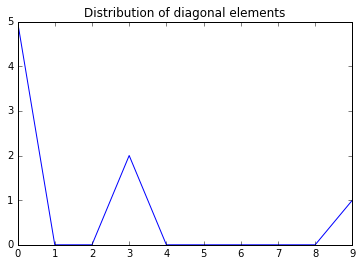

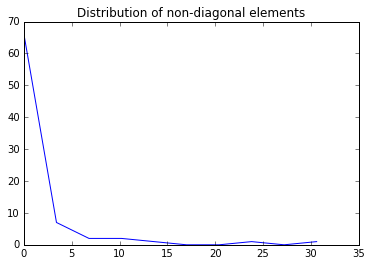

In [18]:
confusionMatrixDist(D)

> The two graphs shows the distribution between the diagional and non-diagonal elements of the confusion matrix. If the distribution of the diagonal elements is skewed to the right and the distribution of the non-diagonal elements are skewed to the left, this indicates that the communities are well-defined since they do not have many links between them. 

> In this case, the non-diagonal distribution is skewed to the left, but there are also some high values of non-diagonal elements that indicates that there exists some communities with a high number of links between them. the distribution of diagonal elements are not skewed to the right completely. This means that we cannot conclude that the predefined communities are well-defined, as this suggests that other communities exists in the GoT universe. This is not completely surprising since some characters change house during the series, and this is not something that we have accounted for in our data extraction.

# Text analysis

> We did not have to use regular rexpressions. The text was decoded using UTF-8. Any unicode error was ignored and the character omitted.  


Tools:

> * *TF-IDF *

> Term Frequency Inverse Document Frequency is used to calculate the frequency of each term in a given document. It it used to discover the presence, how often it used, in a document. It is created by counting how many times any word exists in a text, which gives the TF. The IDF is then calculated by dividing the total number of texts with the number of texts containing the word and taking the logarithm of that. These two are then multiplied with each other, creating the TF-IDF value for the term. We used TF-IDF as it was necessary in order to create a word cloud. 
A numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.


> * *Sentiment Analysis*

> Sentiment analysis is, as the term implies, used to determine the sentiment, the attitude, of a given piece of text. This is done by determining, for example in our case, the happiness rating of each word. We have used the [LabMT](http://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0026752.s001) data set for our happiness scale. The sentiment score for the text is then the sum of each word in the given text. We have chosen to do a sentiment analysis per episode.


>* *Word cloud*

>A word cloud is essentially a visual representation of the term frequency for the analysed. The size of each word in the cloud corresponds to the quantity of said word. 

In [2]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup
import urllib2, json
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Remove all words containing digits
def containsDigit(s):
    try:
        for a in str(s):
            if a.isdigit():
                return True
    # workaround for unicode issues
    except UnicodeEncodeError:
        return True
    return False

# Remove stop words and punctuation and tokenize 
def cleanText(episode):
    return [x.lower() for x in episode if x.lower() not in stopwords.words('english') and True not in [t in string.punctuation for t in x] and not containsDigit(x)]

wordlist = dict()
for i, line in enumerate(open('DataSetS1.txt', 'r')):
    if i > 3:
        data = line.strip().split('\t')
        # read the word and happiness_avg into a dict.
        wordlist[data[0].lower()] = float(data[2])
        
def calcSentiment(tokens):
    sentiment = 0.0
    for token in tokens:
        t = token.lower()
        if t in wordlist:
            sentiment += wordlist[t]
    sentiments = sentiment / len(tokens)
    return sentiments

def getSeasons():
    url = "http://www.avclub.com"
    result = []
    baseurl="http://www.avclub.com/tv/game-of-thrones-newbies/?season=1"
    query = "%s" % (baseurl)
    response = urllib2.urlopen(query)
    source = response.read()

    soup = BeautifulSoup(source, from_encoding=response.info().getparam('charset'))
    
    for link in soup.find_all('a', href=True):
        if 'season' in link['href']:
            result.append(url + link['href'])
    return result

def getReviews(baseurl):
    print baseurl
    url = "http://www.avclub.com"
    result = []
#    baseurl="http://www.avclub.com/tv/game-of-thrones-newbies/?season=1"
    query = "%s" % (baseurl)
    response = urllib2.urlopen(query)
    source = response.read()

    soup = BeautifulSoup(source, from_encoding=response.info().getparam('charset'))

    for link in soup.find_all('a', href=True):
        if link.has_attr('title'):
            if 'Game Of Thrones (newbies)' in link['title']:
                result.append(url + link['href'])
    return result[1:]

def getReview(baseurl):
    query = "%s" % (baseurl)
    response = urllib2.urlopen(query)
    source = response.read()
    soup = BeautifulSoup(source)
    article = soup.find_all('section', {'class':"article-text"})[0].text
    return article

data = []
for season in getSeasons():
    reviews = getReviews(season)
    for review in reviews:
        # The syntax for these two episodes does not follow the rest, so they had to be added manually by links
        if 'mountain-and-viper' in review:
            data.append(getReview("http://www.avclub.com/tvclub/game-thrones-newbies-laws-gods-and-men-204527"))
            data.append(getReview("http://www.avclub.com/tvclub/game-thrones-newbies-mockingbird-204801"))
        data.append(getReview(review))
print 'Done.'

http://www.avclub.com/tv/game-of-thrones-newbies/?season=6
http://www.avclub.com/tv/game-of-thrones-newbies/?season=5
http://www.avclub.com/tv/game-of-thrones-newbies/?season=4
http://www.avclub.com/tv/game-of-thrones-newbies/?season=3
http://www.avclub.com/tv/game-of-thrones-newbies/?season=2
http://www.avclub.com/tv/game-of-thrones-newbies/?season=1
Done.


### Sentiment analysis part 1.
The following contains the sentiment analysis of the reviews.

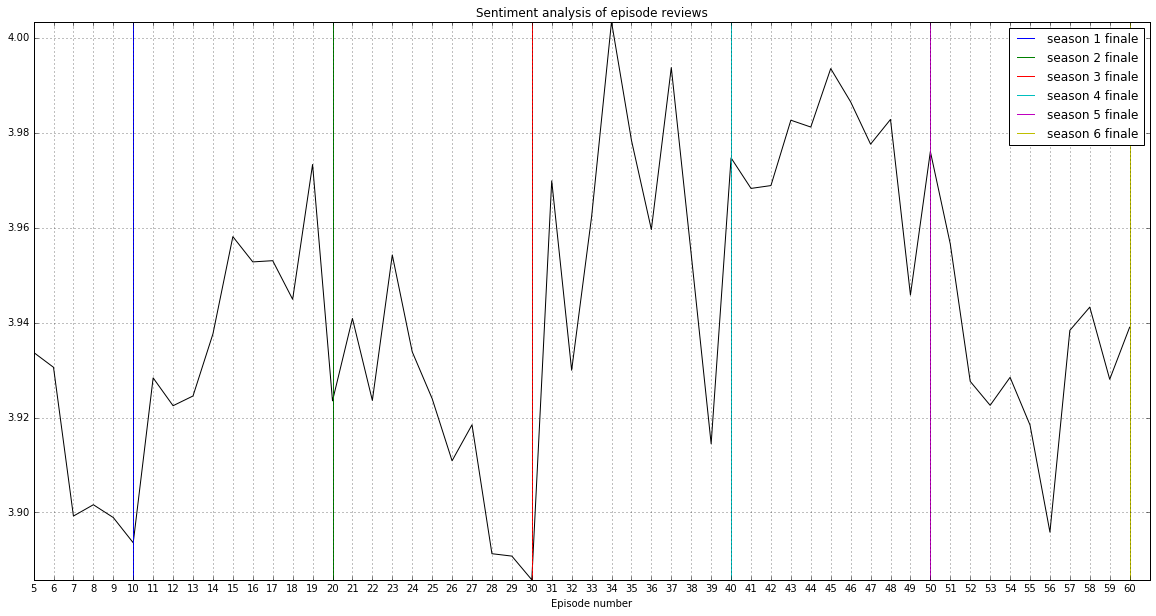

In [3]:
# Remove the 'stray observations' section from each article
d1 = data
for index, a in enumerate(d1):
    d1[index] = a.split('Stray observations')[0]

colors = ['g','b','y','r']
# For each of the novels, calculate the sentiment profile
sentimentscores1 = []
for i, text in enumerate(d1):
    ys = list()
    y = calcSentiment(text)
    sentimentscores1.append(y)
    ys.append(y)
    
# The array is stored from season 6 to 1, so the list is reversed to counteract this
senti = list(reversed(sentimentscores1))
l = range(5, 61)
plt.figure(figsize=(20,10))
plt.plot(l, senti, '-', color='black')
plt.plot((10, 10), (min(senti), max(senti)), '-', label='season 1 finale')
plt.plot((20, 20), (min(senti), max(senti)), '-', label='season 2 finale')
plt.plot((30, 30), (min(senti), max(senti)), '-', label='season 3 finale')
plt.plot((40, 40), (min(senti), max(senti)), '-', label='season 4 finale')
plt.plot((50, 50), (min(senti), max(senti)), '-', label='season 5 finale')
plt.plot((60, 60), (min(senti), max(senti)), '-', label='season 6 finale')
plt.xticks(l)
plt.xlim(5, 61)
plt.ylim(min(senti), max(senti))
plt.grid(True)
plt.legend()
plt.xlabel('Episode number')
plt.title("Sentiment analysis of episode reviews")
plt.show()

> The graph shows the sentiment score for each episode. The seasons are separated with a vertical black line.  
We can see that the first season dips quite low towards the end, which would make sense considering that this is when, spoiler warning, Eddard Stark gets his head chopped off and put on a pike, which, considering the popularity of the character, won't be talked about in particularly happy tones.  
  
> During the first couple of seasons, there is seemingly a trend for the finale to leave the viewer in an unhappy mood, with the end of season 3 being a particularly dour moment in the series with a few instances of bodily desecrations, one being of the trouser-sausage variety.  
  
> From the fourth season on, there's an indication that the second-to-last episode is where the shows gets darkest before a vindication of the characters the audience cheers for during the finale.

### Sentiment analysis part 2.
The following contains sentiment analysis for transcripts.

Done.
done


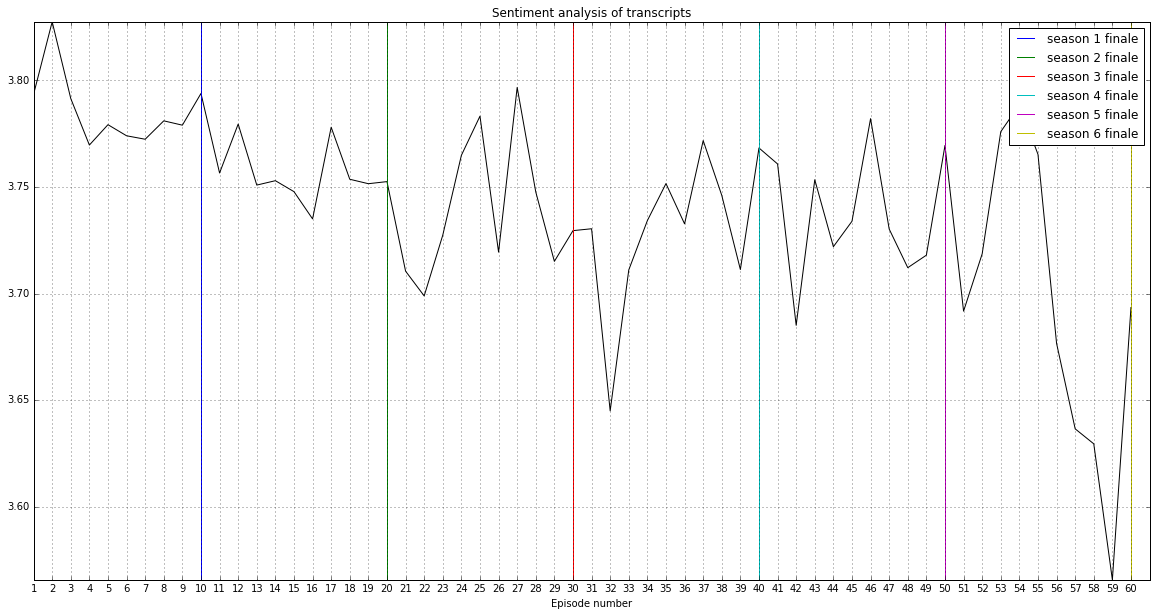

In [4]:
import requests
from bs4 import BeautifulSoup
import urllib2, json
import warnings
warnings.filterwarnings("ignore")

# Extract the links to each season containing transcripts for each episode
def getSeason(season=1):
    result = []
    url = "http://genius.com/albums/Game-of-thrones/Season-" + str(season) + "-scripts"
    soup = BeautifulSoup(requests.get(url).text)
    for link in soup.find_all('a', href=True):
        if 'annotated' in link['href'] and 'Game-of-thrones' in link['href'] and 'preview' not in link['href']:
            result.append(link['href'])
    return result

# Scrape the body text (the episode transcript) from HTML code from Genius
def getScript(url):
    soup = BeautifulSoup(requests.get(url).text)
    return soup.find_all('lyrics', {'class':"lyrics"})[0].text

# Get missing transcripts from local storage (manually downloaded from transcripts.com)
def getEpisodeFromFile(season, episode):
    data = ""
    with open('got/' + str(season) + '_' + str(episode) + '.txt', 'r') as myfile:
        data = myfile.read().replace('\n', '')
    return data

# All episodes are thrown together in one big array in sequential order
d2 = []
for season in [1,4,5,6]:
    if season == 4:
        for s in range(2,4):
            for e in range(1,11):
                d2.append(getEpisodeFromFile(s, e))
    s = getSeason(season=season)
    for episode in s:
        d2.append(getScript(episode))

colors = ['g','b','y','r']
# For each of the novels, calculate the sentiment profile.
sentimentscores2 = []
for i, text in enumerate(d2):
#     xs = list()
    ys = list()
    y = calcSentiment(text)
    sentimentscores2.append(y)
    ys.append(y)

senti = list(reversed(sentimentscores2))
l = range(1, 61)
plt.figure(figsize=(20,10))
plt.plot(l, senti, '-', color='black')
plt.plot((10, 10), (min(senti), max(senti)), '-', label='season 1 finale')
plt.plot((20, 20), (min(senti), max(senti)), '-', label='season 2 finale')
plt.plot((30, 30), (min(senti), max(senti)), '-', label='season 3 finale')
plt.plot((40, 40), (min(senti), max(senti)), '-', label='season 4 finale')
plt.plot((50, 50), (min(senti), max(senti)), '-', label='season 5 finale')
plt.plot((60, 60), (min(senti), max(senti)), '-', label='season 6 finale')
plt.xticks(l)
plt.xlim(1, 61)
plt.ylim(min(senti), max(senti))
plt.grid(True)
plt.legend()
plt.xlabel('Episode number')
plt.title("Sentiment analysis of transcripts")
plt.show()

> It is harder to decern the sentiment of the transcripts. There is a tendency towards a decline in happiness through the series, with a few spikes both up- and downwards and an outlier towards the second-to-last episode of the series with episode 59. This seems to sugges that the tone, while having spikes here and there, gets steadily darker as the show progresses.

## Word Cloud
The following contains a word cloud for the transcripts of each season.

In [5]:
import numpy as np
import nltk
from scipy import sparse
from nltk.corpus import stopwords
import math, string
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud
import random
%matplotlib inline

stops = [x[:-1].lower() for x in open('stopwords.txt', 'r').readlines()]

def BagOfWords(txt):
    return nltk.FreqDist([x.lower() for x in nltk.word_tokenize(txt) if x.lower() not in stopwords.words('english') and x.lower() not in stops and True not in [t in string.punctuation for t in x]])

s1 = BagOfWords(''.join(d2[:10]))
s2 = BagOfWords(''.join(d2[10:20]))
s3 = BagOfWords(''.join(d2[20:30]))
s4 = BagOfWords(''.join(d2[30:40]))
s5 = BagOfWords(''.join(d2[40:50]))
s6 = BagOfWords(''.join(d2[50:]))

totalWordOccurrances = {} # number of articles each word occurs in
allWords = {}             # a dictionary housing all words

for a in [s1, s2, s3, s4, s5, s6]:
    for word in a.keys():
        if word in totalWordOccurrances:
            totalWordOccurrances[word] += 1
        else:
            totalWordOccurrances[word] = 1
            allWords[word] = 0.0

# This function is from the word cloud documentation. It returns a random grey colour for the word cloud.
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

# Creates a bag of words, removing stop words and punctuation.
def BagOfWords(txt):
    return nltk.FreqDist([x.lower() for x in nltk.word_tokenize(txt) if x.lower() not in stopwords.words('english') and True not in [t in string.punctuation for t in x]])

# Creates a string consisting of all words in the TF-IDF, with each word repeated according to its frequency
def generateWordcloudString(td_idf_dict):
    result = ""
    for word, td_idf in td_idf_dict.iteritems():
        result += (word + " ") * int(round(td_idf))
    return result

# Generates the word cloud
def generateWordcloud(string, title):
    got_mask = imread("got.jpg")
    wordcloud = WordCloud(width=1920, height=1080, background_color="black", mask=got_mask).generate(string)
    plt.figure(figsize = (15,15))
    plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def showWordcloud(tfidf, i):
    # TF-IDF is calculated
    tf_idf = {}
    for key, value in tfidf.iteritems():
        tf_idf[key] = value * math.log(float(60/totalWordOccurrances[key]))
    generateWordcloud(generateWordcloudString(tf_idf), "Season " + str(i))

Now we will generate a word cloud of the transcript of each season to discover and display the most frequent words.

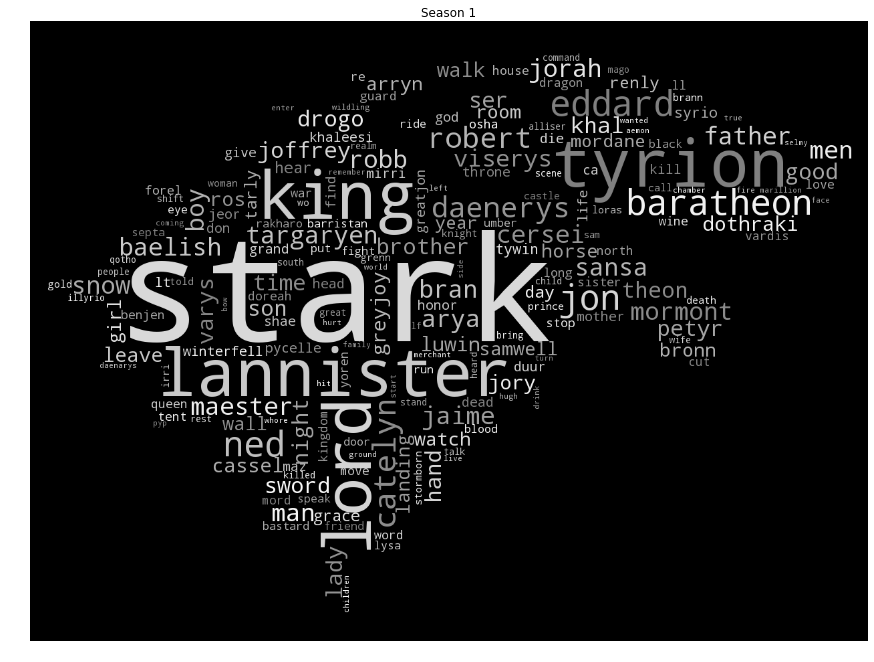

In [6]:
showWordcloud(s1, 1)

> We can see that Eddard (Ned) Stark is one of the more prominent names in the cloud. Tyrion is larger, but Eddard's name is there at least twice (Eddard and Ned), meaning it would be larger than it shows. Stark is easily the most prominent term, indicating that the Stark family takes up the majority of the screen time, with the Lannisters in second place.

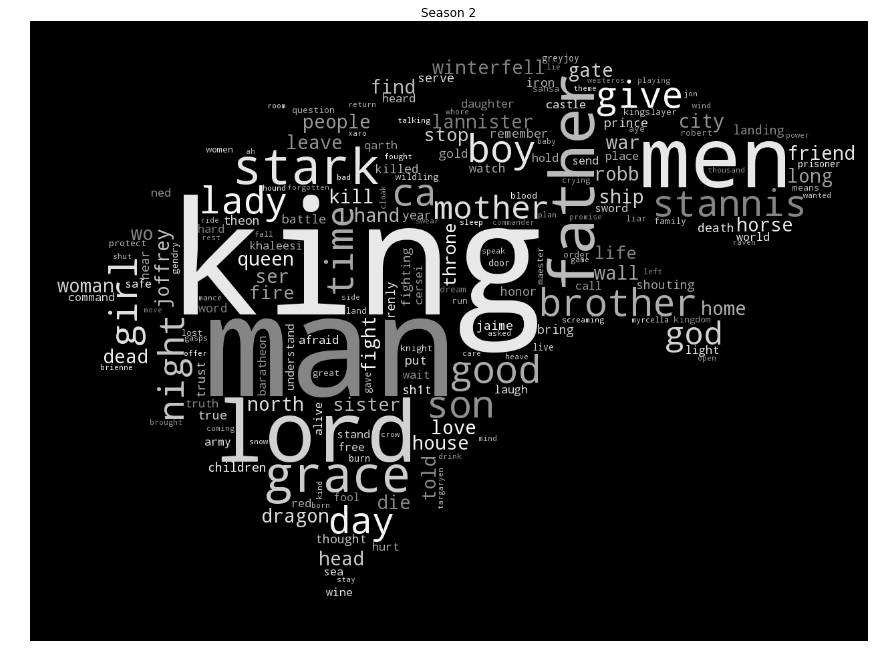

In [7]:
showWordcloud(s2, 2)

> We see a stark decline in the prominence of the Stark house, meaning that either the scripts stop referring to them by their house name, or that other families and characters are put more in focus. We see that the  head of the Stark family, Eddard 'Ned' Stark, is completely absent, which makes sense considering he's dead. King is the most prominent here, indicating that there is a large focus on the king of Winterfell. 

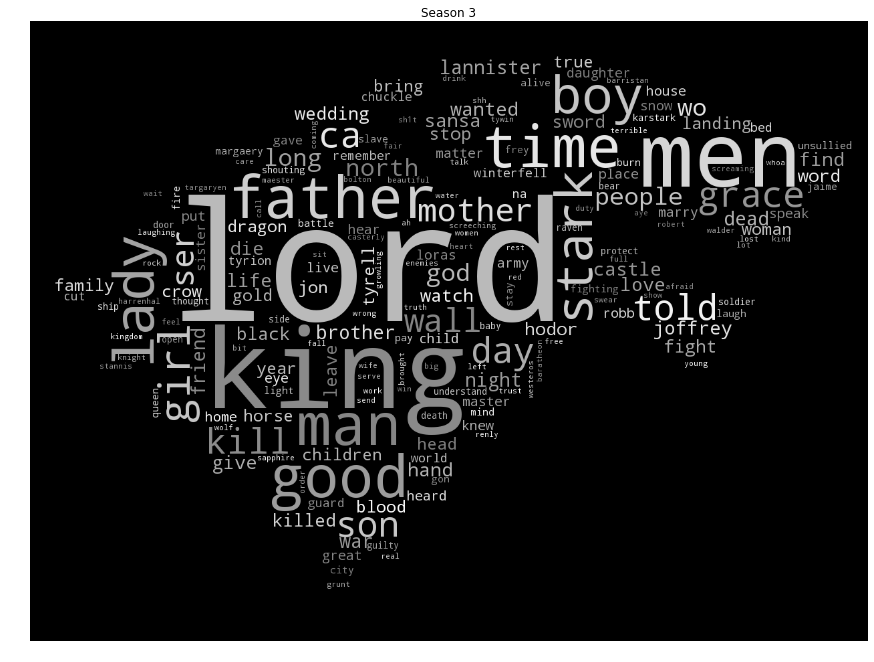

In [8]:
showWordcloud(s3, 3)

> The house and character names are starting to decrease significantly, with none of them being particularly prominent during this season. Focus seems to be on the leader of Winterfell instead.

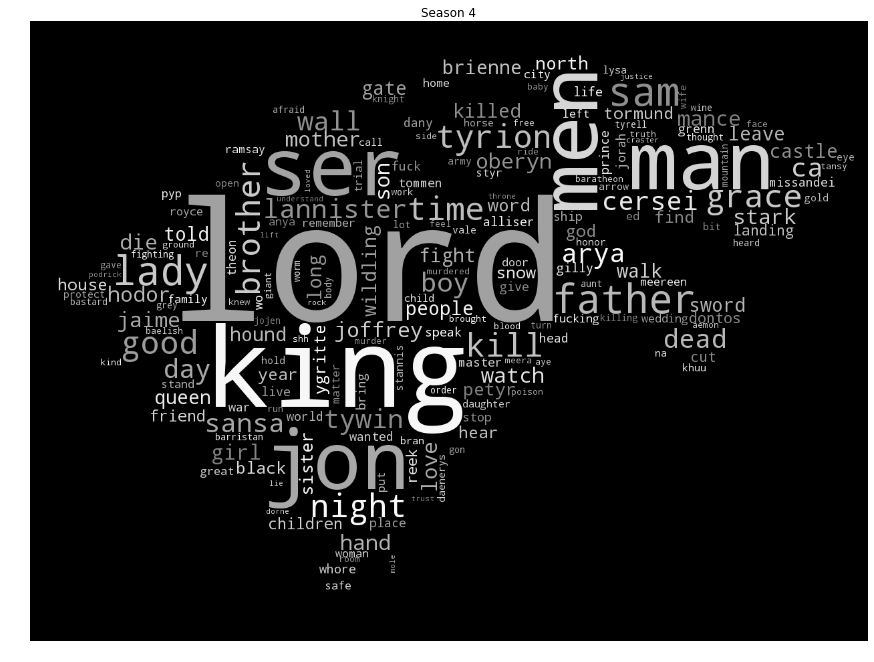

In [9]:
showWordcloud(s4, 4)

> The house names are even smaller this time, but we see Jon start to take up more space compared to any other character. 

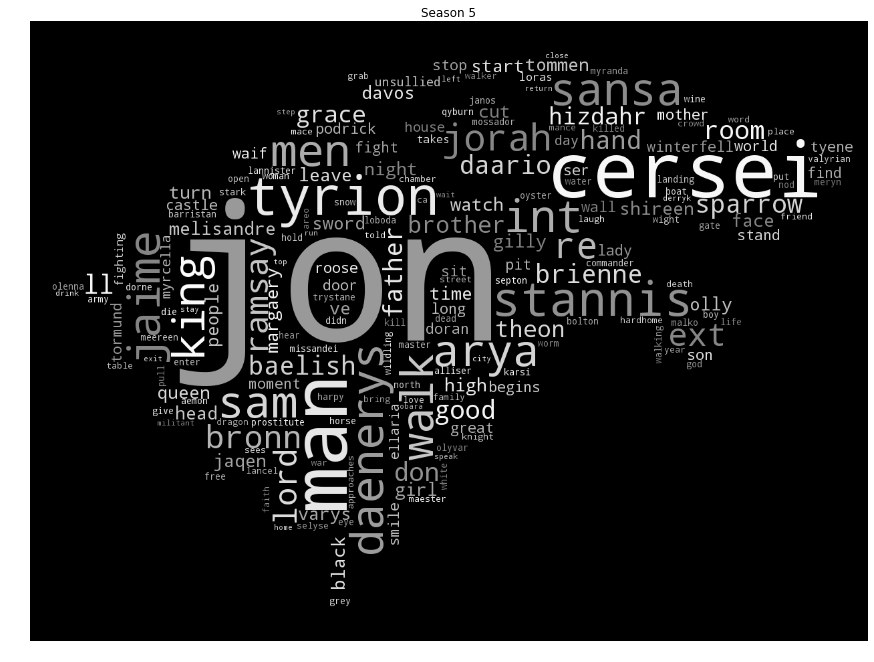

In [10]:
showWordcloud(s5, 5)

> Cersei is starting to become a much more prominent character, when Jon doesn't hog the screen time. Everyone's favourite characer, Tyrion, seemingly hasn't decreased in popularity given that his screen time 

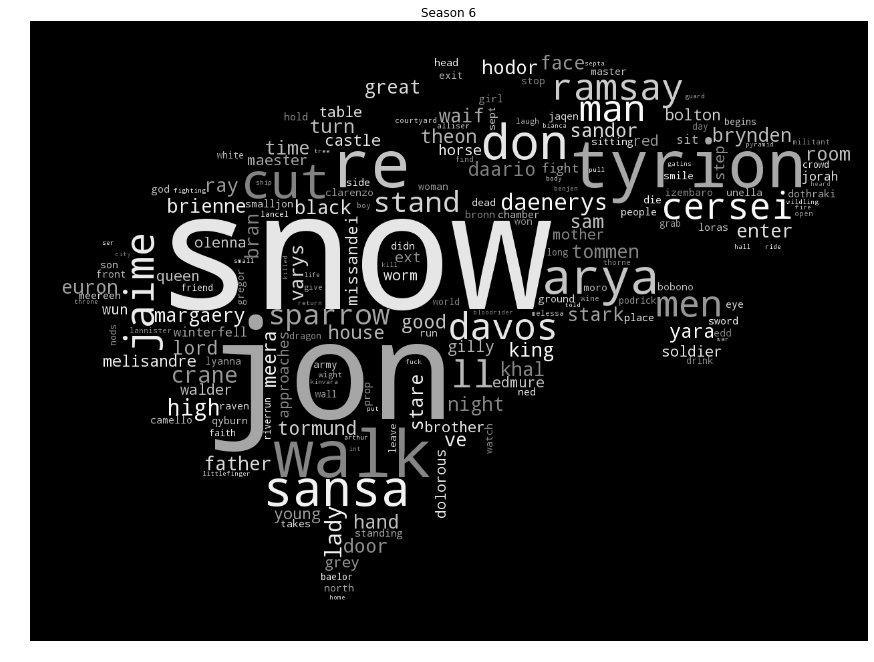

In [11]:
showWordcloud(s6, 6)

> It looks like Jon Snow either has an awful lot of screen time or the characters can't stop talking about him this season. Tyrion remains as prominent as ever. Ramsay is given more attention here than previously, which makes sense considering this was the season where Jon Snow's army fought against Ramsay's army. 

# Discussion
* What went well?

> We have learned a lot about a universe we did not know much about beforehand. We have applied a bunch of the tools from the course, to understand our dataset better, and finally we have visualized our results in the manner we thought was best.

* What is still missing? What could be improved?, Why? 

> The size of the dataset used for network analysis was not that big. We could have included more variables, which may had lead to a different conclusion. It was surprisingly hard to find usable and extractable datasets to work with.

> Initially, we wanted to include data from Twitter in our analysis as well. We decided to drop this part, due to issues with the API. Too many retweets made the data uninteresting and unfit for our purpose. Other than that, we had to look for a different source for our reviews as Rotten Tomatoes would not give us an API key to access their data. We also thought that it would be possible to extract review data from IMDB, but discovered that they do not offer any way to do so (there exists alternatives, but none of those offers the data we were looking for).

# References
* Barabási, Albert-László. Network Science. 1st ed. 2016. 
* Data set (word rank): [LabMT](http://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0026752.s001)